In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [79]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [80]:
# Preprocessing
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Define features and target
X = data.drop(columns=["HeartDisease"])
y = data["HeartDisease"]

**Random Forest**


In [81]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [82]:
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.894927536231884
Confusion Matrix:
 [[104  19]
 [ 10 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       123
           1       0.88      0.93      0.91       153

    accuracy                           0.89       276
   macro avg       0.90      0.89      0.89       276
weighted avg       0.90      0.89      0.89       276



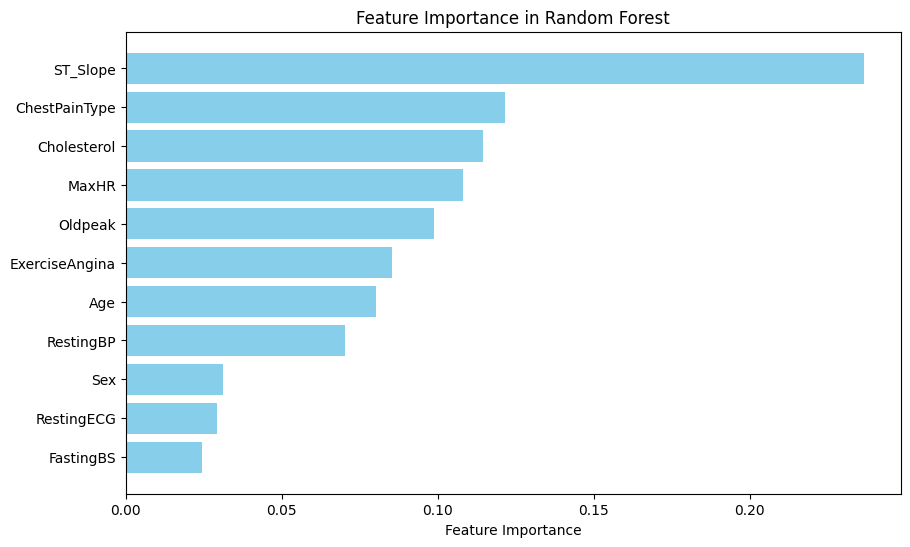

In [83]:
# Feature Importance


feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

Adaboost

In [84]:
# Train AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)  # Weak learner
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   random_state=42)

Accuracy: 0.8731884057971014
Confusion Matrix:
 [[106  17]
 [ 18 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       123
           1       0.89      0.88      0.89       153

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



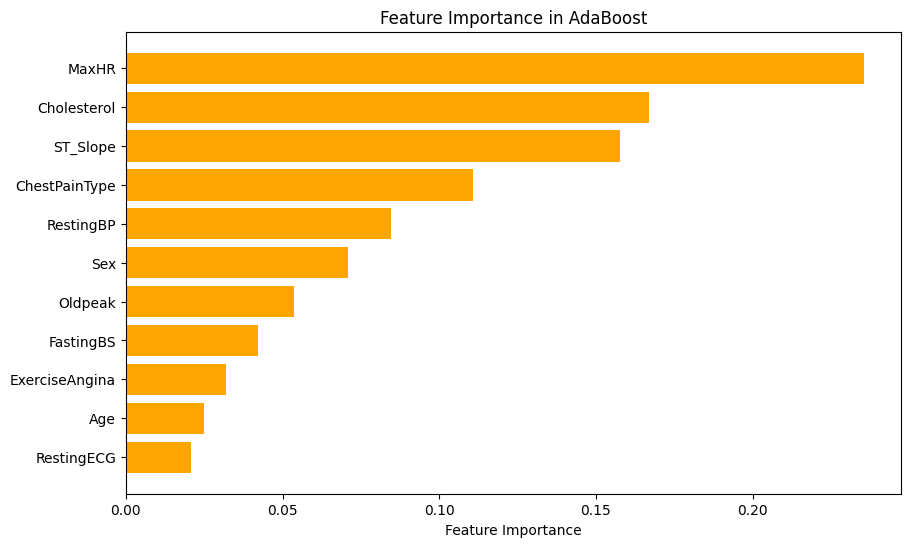

In [85]:
# Predictions
y_pred = ada_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importance = ada_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color='orange')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in AdaBoost")
plt.show()

In [86]:
# Feature Scaling (important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [87]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM Classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

In [88]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8913043478260869
Confusion Matrix:
 [[67 15]
 [ 5 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        82
           1       0.87      0.95      0.91       102

    accuracy                           0.89       184
   macro avg       0.90      0.88      0.89       184
weighted avg       0.89      0.89      0.89       184



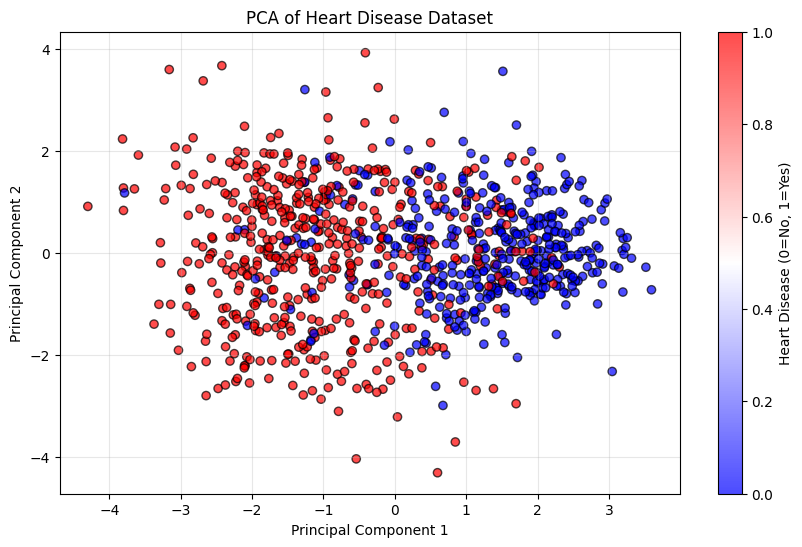

In [93]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce features to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr', alpha=0.7, edgecolor='k')
plt.title('PCA of Heart Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label="Heart Disease (0=No, 1=Yes)")
plt.grid(alpha=0.3)
plt.show()
